# The Evolution of Gender Representation in Literature: A Statistical Analysis of Goodreads Data

## Reading and cleaning the dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from dateutil import parser
import plotly.graph_objects as go
import statsmodels.api as sm
from scipy.stats import f_oneway
import re
import os
import imageio

In [2]:
df = pd.read_csv("good_reads_final.csv")
df

author_average_rating author_gender  \
0                       3.87        female   
1                       4.15        female   
2                       4.17        female   
3                       4.12        female   
4                       4.01        female   
...                      ...           ...   
22886                   3.82          male   
22887                   4.06          male   
22888                   4.36          male   
22889                   3.79          male   
22890                   3.83          male   

                            author_genres  author_id  \
0                            young-adult,    9873809   
1                            young-adult,   17130322   
2                            young-adult,    8107261   
3                                fantasy,   17337861   
4                            young-adult,    4279769   
...                                   ...        ...   
22886                        young-adult,     112719   
22887                young-adult,romance,    6944240   
22888                 self-help,business,    7232341   
22889                          self-help,    6579281   
22890  christian-apologetics,lutheranism,      13342   

                     author_name                             author_page_url  \
0                  Sabina Khan\n            /author/show/9873809.Sabina_Khan   
1                    Erin Hahn\n             /author/show/17130322.Erin_Hahn   
2               Nadine Brandes\n         /author/show/8107261.Nadine_Brandes   
3                Gita Trelease\n         /author/show/17337861.Gita_Trelease   
4                Ashley Poston\n          /author/show/4279769.Ashley_Poston   
...                          ...                                         ...   
22886             Isabel Abedi\n            /author/show/112719.Isabel_Abedi   
22887               Cathy Octo\n             /author/show/6944240.Cathy_Octo   
22888         Chris  Humphreys\n        /author/show/7232341.Chris_Humphreys   
22889              L.B. Sommer\n             /author/show/6579281.L_B_Sommer   
22890  John Warwick Montgomery\n  /author/show/13342.John_Warwick_Montgomery   

       author_rating_count  author_review_count              birthplace  \
0                      211                   88                    \n     
1                      432                  305  \n   United States\n     
2                     3072                 1438  \n   United States\n     
3                      351                  230              Sweden\n     
4                    31208                 7602  \n   United States\n     
...                    ...                  ...                     ...   
22886                12634                  581           Germany\n       
22887                 4340                  261           Indonesia\n     
22888                   14                    3  \n   United States\n     
22889                   28                    2                    \n     
22890                  473                   60       United States\n     

       book_average_rating                                       book_fullurl  \
0                     3.93  https://www.goodreads.com/book/show/36362234-t...   
1                     4.14  https://www.goodreads.com/book/show/36146624-y...   
2                     4.06  https://www.goodreads.com/book/show/40590407-r...   
3                     4.12  https://www.goodreads.com/book/show/36613718-e...   
4                     4.19  https://www.goodreads.com/book/show/39725622-t...   
...                    ...                                                ...   
22886                 3.79  https://www.goodreads.com/book/show/6855506-lu...   
22887                 3.92  https://www.goodreads.com/book/show/17557836-m...   
22888                 4.36  https://www.goodreads.com/book/show/24807089-c...   
22889                 3.59  https://www.goodreads.com/book/show/16148932-1...   
22890                 4.31  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22891 entries, 0 to 22890
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   author_average_rating  22891 non-null  float64
 1   author_gender          22891 non-null  object 
 2   author_genres          22891 non-null  object 
 3   author_id              22891 non-null  int64  
 4   author_name            22891 non-null  object 
 5   author_page_url        22891 non-null  object 
 6   author_rating_count    22891 non-null  int64  
 7   author_review_count    22891 non-null  int64  
 8   birthplace             22891 non-null  object 
 9   book_average_rating    22891 non-null  float64
 10  book_fullurl           22891 non-null  object 
 11  book_id                22891 non-null  object 
 12  book_title             22891 non-null  object 
 13  genre_1                22891 non-null  object 
 14  genre_2                22891 non-null  object 
 15  nu

In [4]:
def convert_publish_date(date):
    if pd.isna(date): 
        return None
    
    date = str(date).strip()

    if re.match(r'^-\d+$', date):  
        return int(date)

    try:
        return parser.parse(date).year  
    except:
        return None 

df['year'] = df['publish_date'].apply(convert_publish_date).astype('Int64')

df = df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22294 entries, 0 to 22293
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   author_average_rating  22294 non-null  float64
 1   author_gender          22294 non-null  object 
 2   author_genres          22294 non-null  object 
 3   author_id              22294 non-null  int64  
 4   author_name            22294 non-null  object 
 5   author_page_url        22294 non-null  object 
 6   author_rating_count    22294 non-null  int64  
 7   author_review_count    22294 non-null  int64  
 8   birthplace             22294 non-null  object 
 9   book_average_rating    22294 non-null  float64
 10  book_fullurl           22294 non-null  object 
 11  book_id                22294 non-null  object 
 12  book_title             22294 non-null  object 
 13  genre_1                22294 non-null  object 
 14  genre_2                22294 non-null  object 
 15  num_rat

In [5]:
df['pages'] = pd.to_numeric(df['pages']
                            .astype(str)           
                            .str.extract(r'(\d+)')[0],  
                            errors='coerce'      
                            ).fillna(0).astype(int) 

/var/folders/3f/k2n3j2750gx96vp8v95xrw2c0000gn/T/ipykernel_7434/3182546523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pages'] = pd.to_numeric(df['pages']


In [6]:
df = df.sort_values(by='year', ascending=True)
df.drop(['publish_date'], axis=1, inplace=True)

## Analysing the Columns

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f" Column: {col}")
    print(f"   Unique values: {df[col].nunique()}")
    print(f"   Most frequent values:\n{df[col].value_counts().head(10)}\n")

 Column: author_gender
   Unique values: 2
   Most frequent values:
author_gender
male      11798
female    10496
Name: count, dtype: int64

 Column: author_genres
   Unique values: 1763
   Most frequent values:
author_genres
romance,                    2562
young-adult,                2473
literature-fiction,         1439
science-fiction-fantasy,     957
fiction,                     819
historical-fiction,          504
mystery-thrillers,           502
fantasy,                     496
children-s-books,            480
contemporary,                292
Name: count, dtype: int64

 Column: author_name
   Unique values: 11851
   Most frequent values:
author_name
John Steinbeck\n           6
Alyson Noel\n              6
Jay Asher\n                6
Marion Zimmer Bradley\n    6
Seth Grahame-Smith\n       6
Alan Moore\n               6
Kim Stanley Robinson\n     6
Elizabeth Gaskell\n        6
Colleen Houck\n            6
Chloe Neill\n              6
Name: count, dtype: int64

 Column: author_pa

 Column: author_average_rating
count    22294.000000
mean         3.960580
std          0.238626
min          1.820000
25%          3.810000
50%          3.970000
75%          4.120000
max          5.000000
Name: author_average_rating, dtype: float64


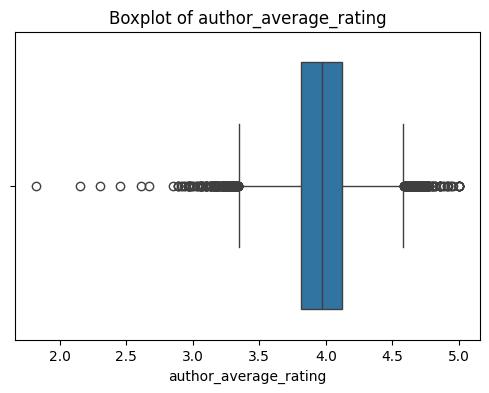

 Column: author_id
count    2.229400e+04
mean     3.226196e+06
std      3.868571e+06
min      4.000000e+00
25%      3.941200e+04
50%      1.402383e+06
75%      5.778087e+06
max      1.877045e+07
Name: author_id, dtype: float64


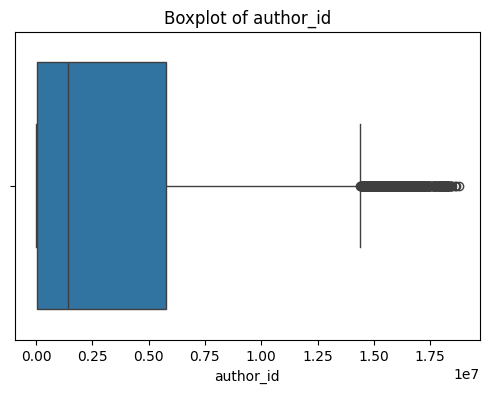

 Column: author_rating_count
count    2.229400e+04
mean     1.741523e+05
std      6.615521e+05
min      6.000000e+00
25%      4.457000e+03
50%      2.531450e+04
75%      1.129222e+05
max      2.111732e+07
Name: author_rating_count, dtype: float64


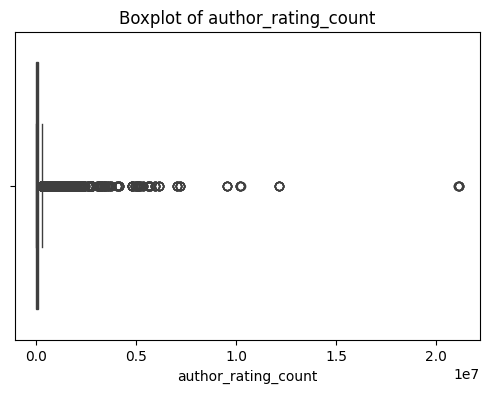

 Column: author_review_count
count     22294.000000
mean       9456.093837
std       25102.366979
min           0.000000
25%         564.000000
50%        2305.500000
75%        8368.000000
max      516745.000000
Name: author_review_count, dtype: float64


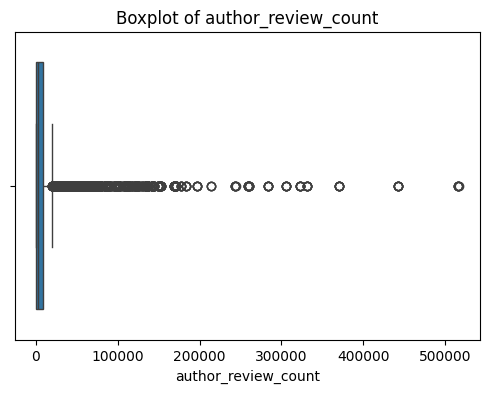

 Column: book_average_rating
count    22294.000000
mean         3.951475
std          0.288448
min          1.850000
25%          3.770000
50%          3.960000
75%          4.140000
max          5.000000
Name: book_average_rating, dtype: float64


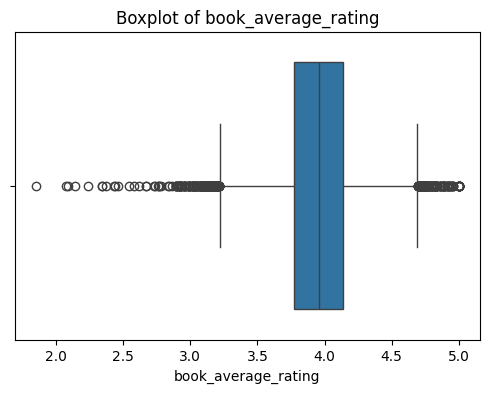

 Column: num_ratings
count    2.229400e+04
mean     4.720156e+04
std      1.814061e+05
min      1.000000e+00
25%      8.560000e+02
50%      4.502000e+03
75%      2.070450e+04
max      3.820921e+06
Name: num_ratings, dtype: float64


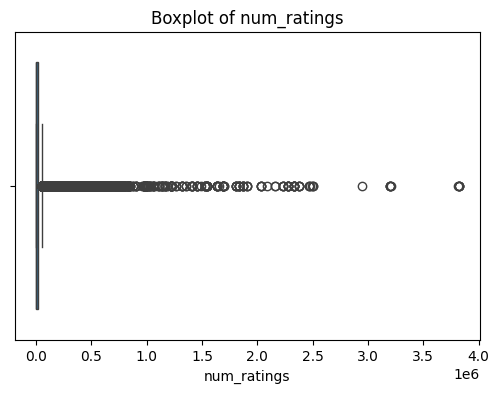

 Column: num_reviews
count     22294.000000
mean       2342.642774
std        6872.536103
min           0.000000
25%         109.000000
50%         393.000000
75%        1521.000000
max      147696.000000
Name: num_reviews, dtype: float64


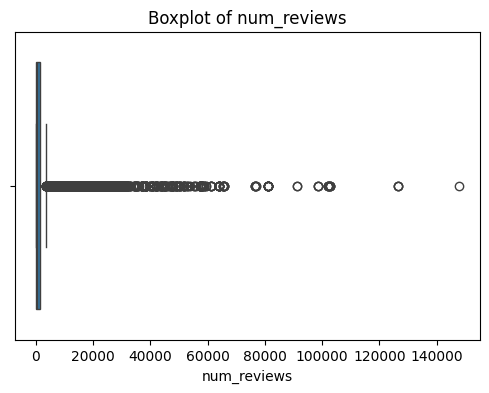

 Column: pages
count    22294.000000
mean       333.505876
std        219.159192
min          0.000000
25%        239.000000
50%        316.000000
75%        384.000000
max       6680.000000
Name: pages, dtype: float64


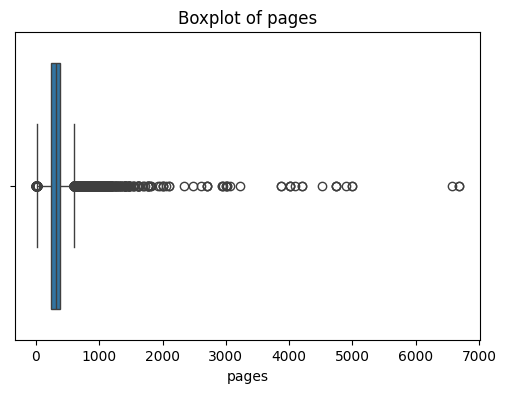

 Column: score
count     22294.000000
mean       3911.994752
std       11127.852309
min          55.000000
25%         834.000000
50%        1731.500000
75%        3619.000000
max      598270.000000
Name: score, dtype: float64


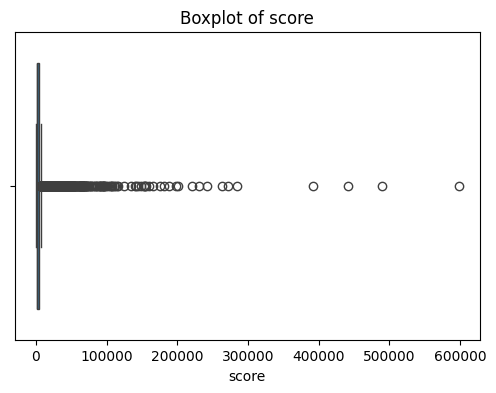

 Column: year
count        22294.0
mean     1990.921504
std       129.945868
min           -720.0
25%           2000.0
50%           2011.0
75%           2013.0
max           2019.0
Name: year, dtype: Float64


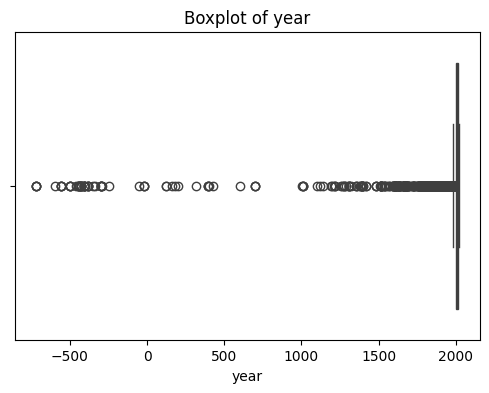

In [8]:
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    print(f" Column: {col}")
    print(df[col].describe())

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

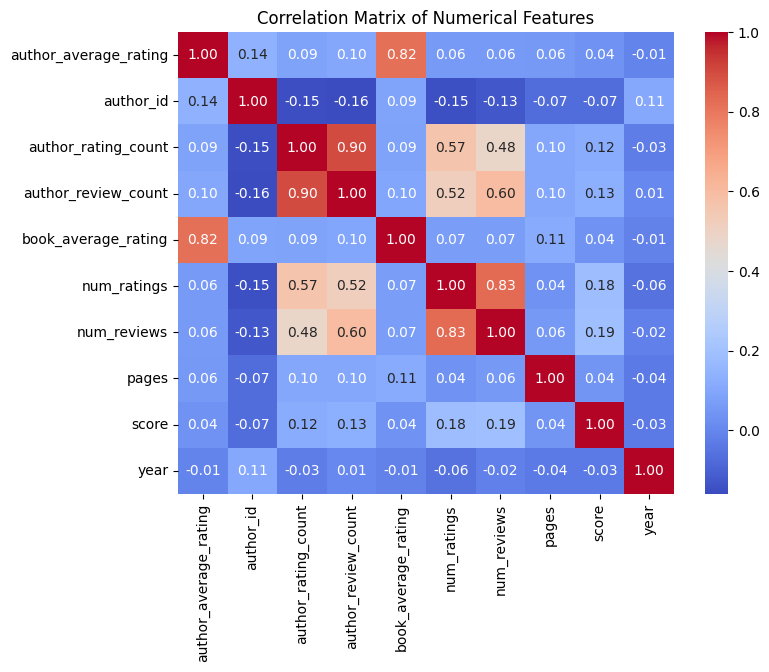

In [9]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.savefig('images/correlation_matrix.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
X = df['author_average_rating']  
y = df['book_average_rating']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     book_average_rating   R-squared:                       0.665
Model:                             OLS   Adj. R-squared:                  0.665
Method:                  Least Squares   F-statistic:                 4.423e+04
Date:                 Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                         16:02:27   Log-Likelihood:                 8271.0
No. Observations:                22294   AIC:                        -1.654e+04
Df Residuals:                    22292   BIC:                        -1.652e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

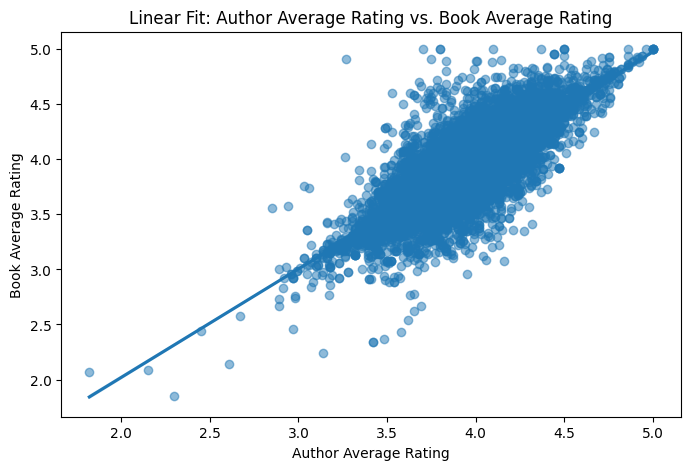

In [11]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df['author_average_rating'], y=df['book_average_rating'], scatter_kws={'alpha':0.5})
plt.title("Linear Fit: Author Average Rating vs. Book Average Rating")
plt.xlabel("Author Average Rating")
plt.ylabel("Book Average Rating")
plt.savefig('images/linear_fit.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
high_author_rating = df[df['author_average_rating'] >= 4.5]
p_book_high_given_author_high = (high_author_rating['book_average_rating'] >= 4.5).mean()

high_rated_books = df[df['book_average_rating'] > 4.0]
p_reviews_high_given_rating_high = (high_rated_books['num_reviews'] > 1000).mean()

print(f"P(Book rating ≥ 4.5 | Author rating ≥ 4.5) = {p_book_high_given_author_high:.2f}")
print(f"P(Reviews > 1000 | Rating > 4.0) = {p_reviews_high_given_rating_high:.2f}")


P(Book rating ≥ 4.5 | Author rating ≥ 4.5) = 0.78
P(Reviews > 1000 | Rating > 4.0) = 0.35


## Research Question 1: Is there a gender disparity in the number of books published by male and female authors?

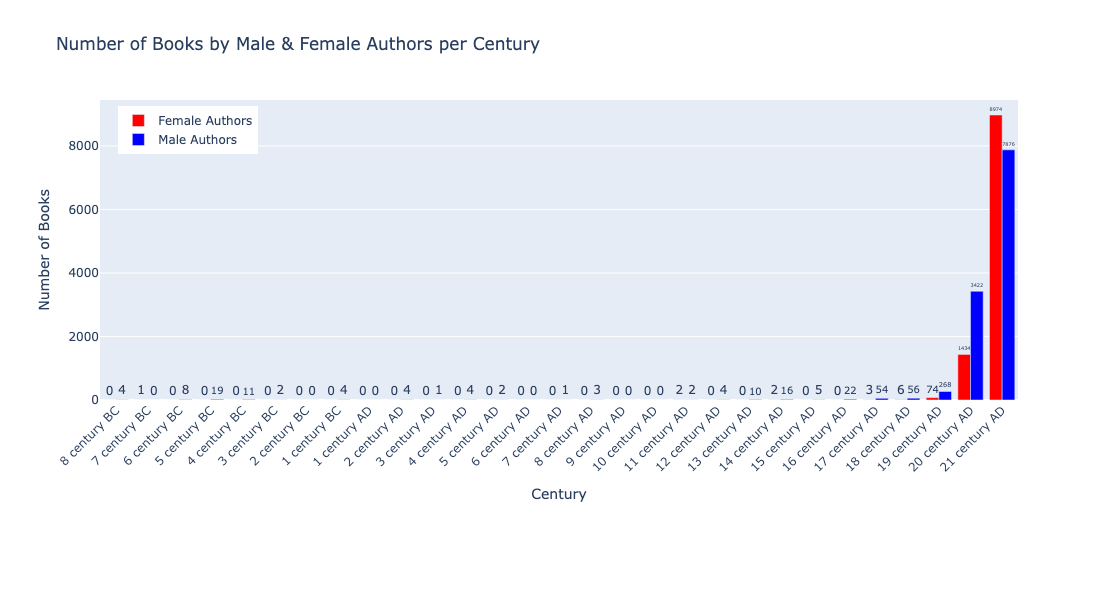

In [13]:
def get_century(year):
    if pd.isna(year):
        return None
    if year < 0:
        century = (abs(year) // 100) + 1
        return f"{century} century BC"
    else:
        century = (year // 100) + 1
        return f"{century} century AD"

df['century'] = df['year'].apply(get_century)

def sort_centuries(century):
    parts = century.split()
    try:
        num = int(parts[0][:-2])  
    except ValueError:
        return 0 
    is_bc = "BC" in parts
    return (-num if is_bc else num)

all_centuries = [
    "8 century BC", "7 century BC", "6 century BC", "5 century BC", "4 century BC", 
    "3 century BC", "2 century BC", "1 century BC", "1 century AD", "2 century AD", 
    "3 century AD", "4 century AD", "5 century AD", "6 century AD", "7 century AD", 
    "8 century AD", "9 century AD", "10 century AD", "11 century AD", "12 century AD", 
    "13 century AD", "14 century AD", "15 century AD", "16 century AD", "17 century AD", 
    "18 century AD", "19 century AD", "20 century AD", "21 century AD"
]

all_centuries_sorted = sorted(all_centuries, key=sort_centuries)

female_books = df[df['author_gender'].str.lower() == 'female'].groupby('century')['book_title'].count()
male_books = df[df['author_gender'].str.lower() == 'male'].groupby('century')['book_title'].count()

female_books_per_century = pd.DataFrame({'century': all_centuries_sorted, 'book_title': female_books.reindex(all_centuries_sorted, fill_value=0).values})
male_books_per_century = pd.DataFrame({'century': all_centuries_sorted, 'book_title': male_books.reindex(all_centuries_sorted, fill_value=0).values})

fig = go.Figure()

fig.add_trace(go.Bar(
    x=female_books_per_century['century'], 
    y=female_books_per_century['book_title'], 
    name='Female Authors',
    marker_color='red',
    text=female_books_per_century['book_title'],
    textposition='outside'
))

fig.add_trace(go.Bar(
    x=male_books_per_century['century'], 
    y=male_books_per_century['book_title'], 
    name='Male Authors',
    marker_color='blue',
    text=male_books_per_century['book_title'],
    textposition='outside'
))

fig.update_layout(
    title="Number of Books by Male & Female Authors per Century",
    xaxis_title="Century",
    yaxis_title="Number of Books",
    barmode='group',  
    width=1200, 
    height=600,  
    xaxis=dict(
        tickangle=-45,  
        tickmode='array', 
        tickvals=female_books_per_century['century'],  
        ticktext=female_books_per_century['century'], 
    ),
    margin=dict(l=100, r=100, t=100, b=200), 
    legend=dict(x=0.02, y=0.98)
)

fig.show()
fig.write_image('images/books_by_gender_and_century.png')

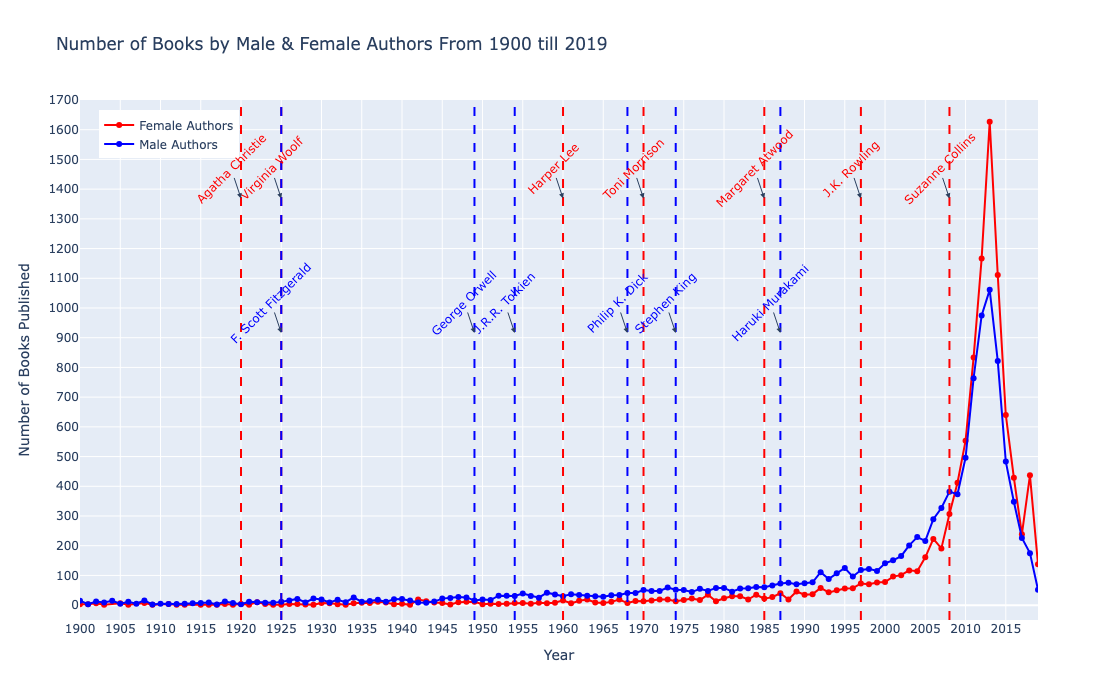

In [14]:
filtered_df = df[df['year'] >= 1900]

female_books_per_year = filtered_df[filtered_df['author_gender'].str.lower() == 'female'].groupby('year')['book_title'].count().reset_index()
male_books_per_year = filtered_df[filtered_df['author_gender'].str.lower() == 'male'].groupby('year')['book_title'].count().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=female_books_per_year['year'], 
    y=female_books_per_year['book_title'], 
    mode='lines+markers', 
    name='Female Authors',
    line=dict(color='red')  
))

fig.add_trace(go.Scatter(
    x=male_books_per_year['year'], 
    y=male_books_per_year['book_title'], 
    mode='lines+markers', 
    name='Male Authors',
    line=dict(color='blue') 
))

famous_female_authors = {
    "J.K. Rowling": 1997,
    "Virginia Woolf": 1925,
    "Agatha Christie": 1920,
    "Harper Lee": 1960,
    "Toni Morrison": 1970,
    "Margaret Atwood": 1985,
    "Suzanne Collins": 2008,
}

famous_male_authors = {
    "F. Scott Fitzgerald": 1925,
    "J.R.R. Tolkien": 1954,
    "George Orwell": 1949,
    "Stephen King": 1974,
    "Haruki Murakami": 1987,
    "Philip K. Dick": 1968,
}

for author, year in famous_female_authors.items():
    fig.add_vline(x=year, line_width=2, line_dash="dash", line_color="red")
    fig.add_annotation(x=year, y=max(female_books_per_year['book_title']) * 0.8,
                       text=author, showarrow=True, arrowhead=2, yshift=20, textangle=-45, font=dict(color='red'))

for author, year in famous_male_authors.items():
    fig.add_vline(x=year, line_width=2, line_dash="dash", line_color="blue")
    fig.add_annotation(x=year, y=max(male_books_per_year['book_title']) * 0.8,
                       text=author, showarrow=True, arrowhead=2, yshift=20, textangle=-45, font=dict(color='blue'))

fig.update_layout(
    title="Number of Books by Male & Female Authors From 1900 till 2019",
    xaxis=dict(title="Year", dtick=5, range=[1900, max(filtered_df['year'])]),  
    yaxis=dict(title="Number of Books Published", dtick=100, range = [-50, 1700],), 
    width=1200,  
    height=700,  
    legend=dict(x=0.02, y=0.98), 
)

fig.show()
fig.write_image('images/books_by_gender_1900.png')

In [15]:
filtered_df = df[df['year'] >= 1900]
grouped = filtered_df.groupby(['year', 'author_gender'])['book_title'].count().reset_index()

grouped['author_gender'] = grouped['author_gender'].str.capitalize() + ' Authors'
grouped.rename(columns={'author_gender': 'Gender', 'book_title': 'Count'}, inplace=True)

years = pd.DataFrame({'year': range(1900, 2020)})
pivot = grouped.pivot(index='year', columns='Gender', values='Count')
pivot = pivot.reindex(years['year']) 
pivot = pivot.fillna(0).astype(int)

melted = pivot.reset_index().melt(id_vars='year', var_name='Gender', value_name='Count')

os.makedirs("frames", exist_ok=True)
year_range = range(1900, 2020)
for i, year in enumerate(year_range):
    frame_data = melted[melted['year'] <= year]
    fig = px.line(
        frame_data,
        x='year',
        y='Count',
        color='Gender',
        color_discrete_map={
            'Female Authors': 'red',
            'Male Authors': 'blue'
        },
        title=f'Books Published by Gender (1900–{year})',
        range_y=[0, melted['Count'].max() + 50],
    )
    fig.update_layout(
        width=1000,
        height=600,
        showlegend=True,
        xaxis=dict(dtick=10),
        transition_duration=0
    )
    fig.write_image(f"frames/frame_{i:03}.png")

frames = []
durations = []

for i in range(len(year_range)):
    frame = imageio.v2.imread(f"frames/frame_{i:03}.png")
    frames.append(frame)
    durations.append(0.08) 

final_frame = imageio.v2.imread(f"frames/frame_{len(year_range)-1:03}.png")
frames.append(final_frame)
durations.append(2.5)

imageio.mimsave("images/books_by_gender.gif", frames, duration=durations)

print("GIF saved")

GIF saved


## Research Question 2: Do male and female authors prefer different genres, and if so, which genres?

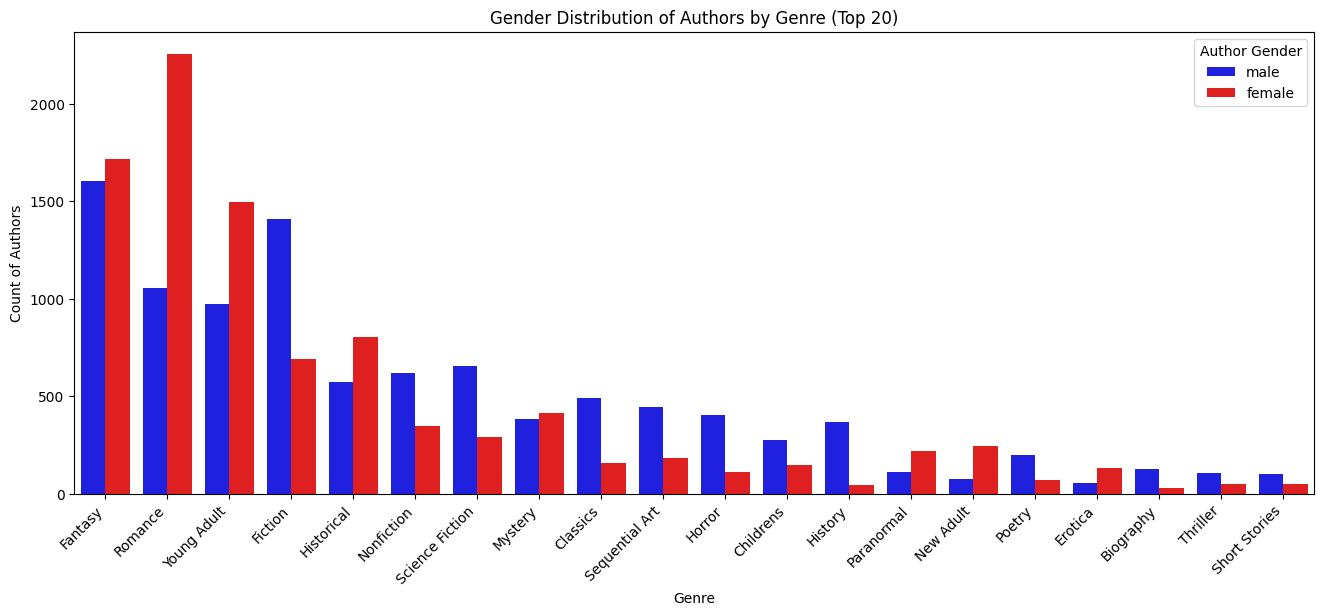

In [16]:
df_filtered = df[df['genre_1'].notna() & (df['genre_1'] != '')]
top_genres = df_filtered['genre_1'].value_counts().nlargest(20).index
df_top = df_filtered[df_filtered['genre_1'].isin(top_genres)]
plt.figure(figsize=(16, 6))

custom_palette = {"female": "red", "male": "blue"}
sns.countplot(x='genre_1', hue='author_gender', data=df_top, order=top_genres, palette=custom_palette)

plt.xticks(rotation=45, ha="right") 
plt.title("Gender Distribution of Authors by Genre (Top 20)")
plt.xlabel("Genre")
plt.ylabel("Count of Authors")
plt.legend(title="Author Gender")
plt.savefig('images/gender_distribution_by_genre.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

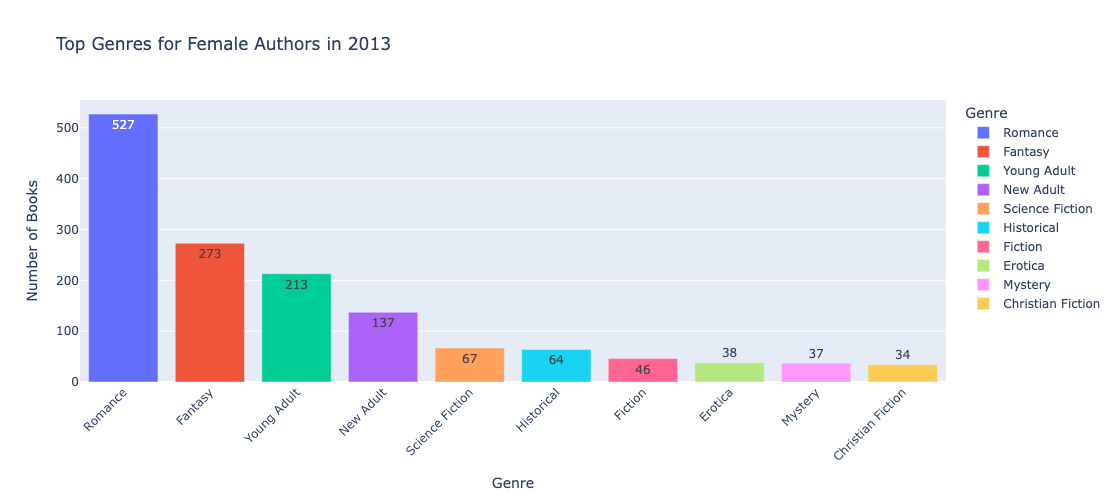

In [17]:
female_2013 = df[(df['year'] == 2013) & (df['author_gender'].str.lower() == 'female')]

top_genres_2013 = female_2013['genre_1'].value_counts().reset_index()
top_genres_2013.columns = ['Genre', 'Count'] 

fig = px.bar(top_genres_2013.head(10),
             x='Genre', 
             y='Count', 
             title="Top Genres for Female Authors in 2013",
             text='Count', 
             color='Genre', 
             color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(
    xaxis_title="Genre",
    yaxis_title="Number of Books",
    xaxis_tickangle=-45,  
    width=900, height=500
)

fig.show()
fig.write_image("images/genres_by_female_authors_2013.png")

## Research Question 3: Do gender, genre, and publication date influence the popularity of books?

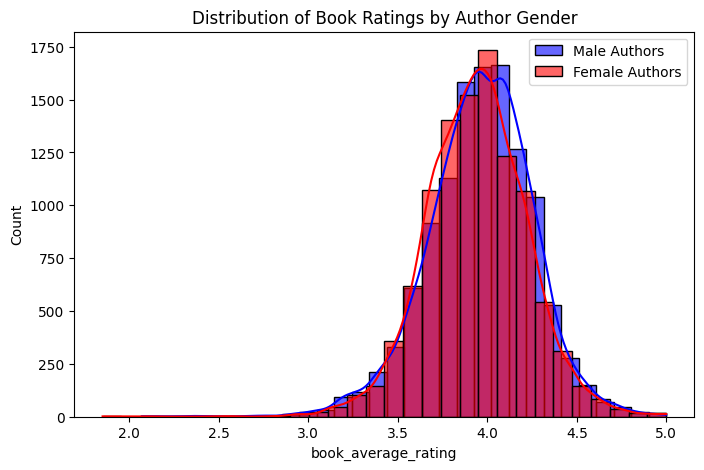

In [18]:
male_ratings = df[df['author_gender'] == 'male']['book_average_rating']
female_ratings = df[df['author_gender'] == 'female']['book_average_rating']

plt.figure(figsize=(8,5))
sns.histplot(male_ratings, color='blue', label='Male Authors', kde=True, bins=30, alpha=0.6)
sns.histplot(female_ratings, color='red', label='Female Authors', kde=True, bins=30, alpha=0.6)
plt.legend()
plt.title("Distribution of Book Ratings by Author Gender")
plt.savefig('images/book_ratings_by_gender_hist.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

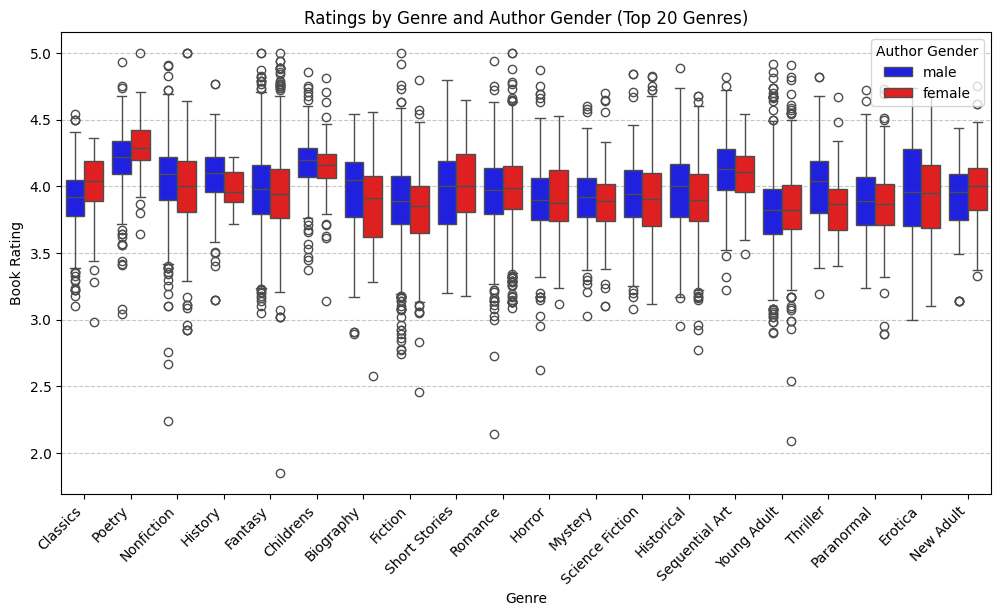

In [19]:
custom_palette = {'male': 'blue', 'female': 'red'} 

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_1', y='book_average_rating', hue='author_gender', data=df_top, palette=custom_palette) 

plt.xticks(rotation=45, ha='right') 
plt.title("Ratings by Genre and Author Gender (Top 20 Genres)")
plt.xlabel("Genre")
plt.ylabel("Book Rating")
plt.legend(title="Author Gender", loc="upper right")  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.savefig('images/book_ratings_by_genre_gender.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
genres = df['genre_1'].unique()
ratings_by_genre = [df[df['genre_1'] == g]['book_average_rating'] for g in genres]

anova_result = f_oneway(*ratings_by_genre)
print(f"ANOVA test: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

ANOVA test: F-statistic = 21.01, p-value = 0.0000


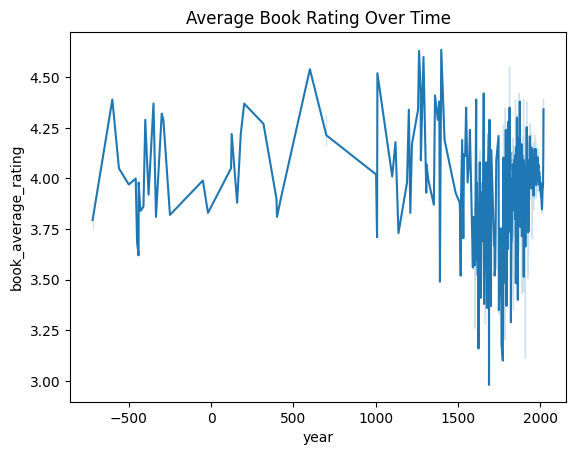

In [21]:
sns.lineplot(x=df['year'], y=df['book_average_rating'])
plt.title("Average Book Rating Over Time")
plt.savefig('images/time_trends.png', format='png', dpi=300, bbox_inches='tight')
plt.show()